Index(['Code Pays', 'Pays', 'Groupe de pays', 'Code ISO3'], dtype='object')
Index(['Code Pays', 'Pays', 'Valeur'], dtype='object')


Index(['Code Pays', 'Pays_x', 'Groupe de pays', 'Code ISO3', 'Valeur'], dtype='object')

,Code Pays,Pays_x,Groupe de pays,Code ISO3,Valeur
0,202,Afrique du Sud,Afrique,ZAF,2.6
1,4,Algérie,Afrique,DZA,1.8
2,7,Angola,Afrique,AGO,8.0
3,53,Bénin,Afrique,BEN,1.0
4,20,Botswana,Afrique,BWA,0.5
...,...,...,...,...,...
143,249,Yémen,Asie,YEM,7.1
144,3,Albanie,Europe,ALB,0.2
151,27,Bulgarie,Europe,BGR,0.3
177,272,Serbie,Europe,SRB,0.5


[28457:0108/141922.685248:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


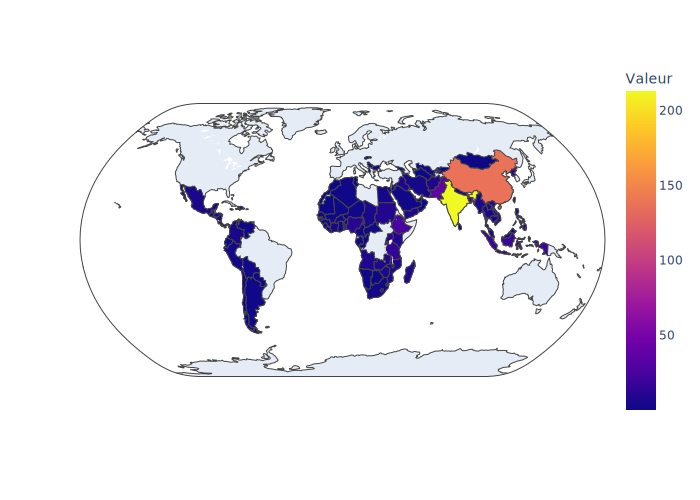

In [17]:
from IPython.display import display
import glob, sys 
import sqlite3 as sql
import pandas as pd
import numpy as np
import plotly.express as px
from colorama import Fore, Back, Style
from functools import reduce
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.offline import init_notebook_mode

pio.renderers.default = "notebook_connected"
init_notebook_mode(connected=False)
cf.go_offline()

# Ouverture sqllite
conn = sql.connect('continent.sqlite')

# Noms de colonnes à utiliser
names = ['Code Groupe de pays', 'Groupe de pays', 'Code Pays', 'Pays',
       'Code M49', 'Code ISO2', 'Code ISO3']

names_cols = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

df = pd.read_csv('fao_2013/FAOSTAT_2013_Continent.csv', names=names, header=0)
df_surfaces = pd.read_csv('fao_2013/FAOSTAT_2013_superficiepays.csv', names=names_cols, header=0)
df_population = pd.read_csv('fao_2013/FAOSTAT_2013_population.csv', names=names_cols, header=0)

df_surfaces.rename(columns={"Valeur" : "Superficie"}, inplace=True)
df_population.rename(columns={"Valeur":"Population"}, inplace=True)
df.to_sql('continents', conn, if_exists='replace')

# requètes sql permettant de grouper les pays selon leur continent

req_afrique = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Afrique" '''

req_asie = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3" FROM continents 
WHERE continents."Groupe de Pays" = "Asie" '''

req_europe = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Europe" '''

req_amerique = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Amériques" '''

req_oceanie= '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Océanie" '''

df_afrique = pd.read_sql(req_afrique, conn)
df_asie = pd.read_sql(req_asie, conn)
df_europe = pd.read_sql(req_europe, conn)
df_amerique = pd.read_sql(req_amerique, conn)
df_oceanie = pd.read_sql(req_oceanie, conn)

# print(df_afrique)
# print(df_asie)
# print(df_europe)
# print(df_amerique)
# print(df_oceanie)

list_dfs = [df_afrique, df_amerique, df_asie, df_europe, df_oceanie]
df_continents = reduce(lambda  left,right: pd.merge(left,right,on=['Code Pays', 'Pays', 'Code ISO3', 'Groupe de pays'], how='outer'), list_dfs)
print(df_continents.columns)

df_food = pd.read_csv('fao_2013/FAOSTAT_2013_sous_alimentation.csv', names=names_cols, header=0)
df_food = df_food[["Code Pays", "Pays", "Valeur"]]
print(df_food.columns)
df_result = pd.merge(df_continents, df_food, on="Code Pays")
del df_result["Pays_y"]
df_result.rename({"Pays_x":"Pays"}, inplace=True)
display(df_result.columns)
df_result.dropna(subset=["Valeur"],inplace=True)

display(df_result)
fig = px.choropleth(df_result,               #dataframe
                     locations= "Code ISO3",
                     locationmode= "ISO-3" , #location code
                     color = "Valeur",     #column shown by color
                     hover_name = "Pays_x",  #hover info title 
                     # animation_frame = "Code Pays",#column animated
                     projection = "natural earth" #type of map
                     )

fig.show()

Index(['Code ISO3', 'Pays', 'Densite'], dtype='object')
Index(['Code Pays', 'Pays', 'Groupe de pays', 'Code ISO3'], dtype='object')


,Code Pays,Pays,Continent,Code ISO3,Densite
1,202.0,Afrique du Sud,Afrique,ZAF,3.790002
2,4.0,Algérie,Afrique,DZA,2.773436
3,7.0,Angola,Afrique,AGO,3.038203
5,53.0,Bénin,Afrique,BEN,4.485538
6,20.0,Botswana,Afrique,BWA,1.291816
...,...,...,...,...,...
238,167.0,Tchéquie,Europe,CZE,4.913830
239,230.0,Ukraine,Europe,UKR,4.363385
241,10.0,Australie,Océanie,AUS,1.102131
263,156.0,Nouvelle-Zélande,Océanie,NZL,2.825550


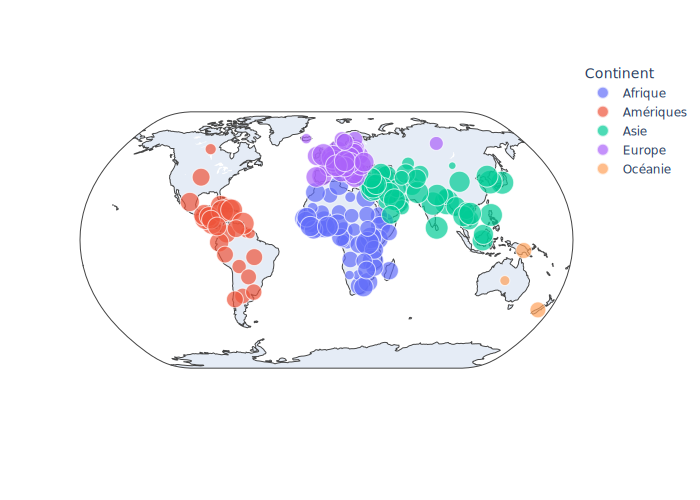

In [18]:
conn = sql.connect('continent.sqlite')

# Noms de colonnes à utiliser
names = ['Code Groupe de pays', 'Groupe de pays', 'Code Pays', 'Pays',
       'Code M49', 'Code ISO2', 'Code ISO3']

names_cols = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

df = pd.read_csv('fao_2013/FAOSTAT_2013_Continent.csv', names=names, header=0)
df.to_sql('continents', conn, if_exists='replace')


import pandas as pd

df_densite = {'Code ISO3' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],
              'Pays' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],
              'Densite' : [49.475786149058, 44.25650611249, 105.6602919708, 16.013559414546, 231.15571256593, 20.86771957969, 13.979717075485, 15.421160233713, 101.77706357569, 3.0105735261575, 102.760821619, 113.92348080669, 1707.8298701299, 1173.5531458862, 46.539372523508, 368.54052179656, 88.724671869457, 18.633024634677, 9.7317225145389, 69.1913671875, 3.6393891270976, 24.052708377701, 66.922577376566, 62.400551900585, 371.50708722741, 85.125368230229, 46.703687250111, 3.9130669593412, 126.98263027295, 7.1397877941507, 23.632487909061, 144.64543295393, 123.79502164502, 41.906707525913, 398.44760881247, 13.536623718887, 31.476502062151, 207.03845195582, 517.6122698253, 92.87330591461, 69.457566037736, 76.043331427346, 108.2587027442, 140.3733, 38.10595340811, 207.99474228938, 88.808731729369, 129.51151788229, 63.244777741987, 27.108406214534, 93.200945602847, 30.319691741431, 63.188546511628, 34.551813188855, 84.519010699439, 17.89783145217, 120.53299473845, 7.0519268832227, 194.04229249012, 65.041953882221, 116.93610354223, 85.067579519007, 140.38802724897, 44.330217320527, 38.374759358289, 58.615184921764, 3.8571551943104, 377.38287373004, 78.635481276254, 109.27959792334, 430.79726455423, 134.11598710852, 76.376232355434, 46.957171713451, 67.118827115692, 3.229566084788, 372.43530499076, 203.6871208381, 263.9621421976, 349.64334705075, 95.956206352782, 6.3101644627181, 79.980296587834, 29.820646506778, 167.5484523, 197.88900112233, 28.341863084922, 66.81581027668, 32.343628971347, 578.00742913001, 44.106488787375, 3.5920467849552, 47.190889509374, 211.05785290896, 81.84107850912, 39.465897215538, 89.693876122356, 168.00261985575, 13.481387324925, 75.544936141609, 620.02610837438, 3.7037906277287, 61.126653463309, 99.547027892886, 1.8505553702068, 46.18639405, 32.504326152751, 79.396802841918, 2.7129031082608, 187.76975933031, 50.377779624397, 14.6082632036, 188.59406765704, 13.912088683768, 16.870229007634, 12.164151857835, 178.00976959904, 69.39872277639, 248.10709708385, 51.593314500942, 17.198224616879, 16.386289957211, 498.79584446423, 23.2609265625, 331.59458698058, 124.22911074099, 114.15612869138, 201.25572782084, 86.87429031, 265.06953664283, 8.7627852575004, 438.24637211188, 302.41679536679, 71.58587752558, 81.91324034, 95.095247991133, 7636.7213578501, 112.57263766428, 102.28167825223, 20.823972646412, 19.846121520343, 16.386356083744, 328.25705629086, 23.568483504063, 204.7106488511, 3.5083012820513, 106.6191036323, 57.58632466419, 54.733723188079, 10.499073221093, 136.15995855996, 133.38393587661, 127.8676411105, 263.88070175439, 70.500444129763, 11.419522056477, 98.651889869158, 78.522488434717, 19.365992458005, 33.763444249192, 289.93759666906, 47.629812299941, 20.079031194931, 34.510476929042]}

df_densite=pd.DataFrame(df_densite)
df_densite=pd.DataFrame(df_densite)
#Imprimer la df_densite (vision tronquée)
df_densite["Densite"] = np.log(df_densite['Densite'])
print(df_densite.columns)

# requètes sql permettant de grouper les pays selon leur continent

req_afrique = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Afrique" '''

req_asie = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3" FROM continents 
WHERE continents."Groupe de Pays" = "Asie" '''

req_europe = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Europe" '''

req_amerique = '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Amériques" '''

req_oceanie= '''SELECT "Code Pays", Pays, "Groupe de Pays", "Code ISO3"  FROM continents 
WHERE continents."Groupe de Pays" = "Océanie" '''

df_afrique = pd.read_sql(req_afrique, conn)
df_asie = pd.read_sql(req_asie, conn)
df_europe = pd.read_sql(req_europe, conn)
df_amerique = pd.read_sql(req_amerique, conn)
df_oceanie = pd.read_sql(req_oceanie, conn)

# print(df_afrique)
# print(df_asie)
# print(df_europe)
# print(df_amerique)
# print(df_oceanie)

list_dfs = [df_afrique, df_amerique, df_asie, df_europe, df_oceanie]
df_continents = reduce(lambda  left,right: pd.merge(left,right,on=['Code Pays', 'Pays', 'Code ISO3', 'Groupe de pays'], how='outer'), list_dfs)
print(df_continents.columns)

df_final = df_continents.merge(df_densite[['Code ISO3', 'Densite']], on='Code ISO3', how='outer')
df_final.rename(columns={'Groupe de pays':'Continent'}, inplace=True)
df_final = df_final.dropna()
display(df_final)




fig = px.scatter_geo(df_final,               #dataframe
                     locations= "Code ISO3",
                     locationmode= "ISO-3" , #location code
                     color = "Continent",     #column shown by color
                     hover_name = "Pays",  #hover info title 
                     size = "Densite",     #column shown by size
                     # animation_frame = "Code Pays",#column animated
                     projection = "natural earth" #type of map
                     )

fig.show()